In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
     

In [2]:
df_dalys = pd.read_csv('mental-and-substance-use-as-share-of-disease1.csv')
df_prevalence = pd.read_csv('prevalence-by-mental-and-substance-use-disorder1.csv')

In [3]:
df_merged = pd.merge(df_dalys, df_prevalence, on=['Entity', 'Code', 'Year'])

     

In [4]:
# Feature Engineering
# Select relevant features for mental fitness tracking
features = [ 'Schizophrenia','Bipolar disorder','Eating disorders',' Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders']

     

In [5]:
#set axis
df_merged.set_axis(['Country','Code','Year','DALY','Schizophrenia','Bipolar disorder','Eating disorders',' Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders'], axis='columns', inplace='True')
     

C:\Users\kommu\AppData\Local\Temp\ipykernel_19932\2006722587.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_merged.set_axis(['Country','Code','Year','DALY','Schizophrenia','Bipolar disorder','Eating disorders',' Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders'], axis='columns', inplace='True')


C:\Users\kommu\AppData\Local\Temp\ipykernel_9068\3344114545.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_merged.corr(),annot=True,cmap='Blues')


[]

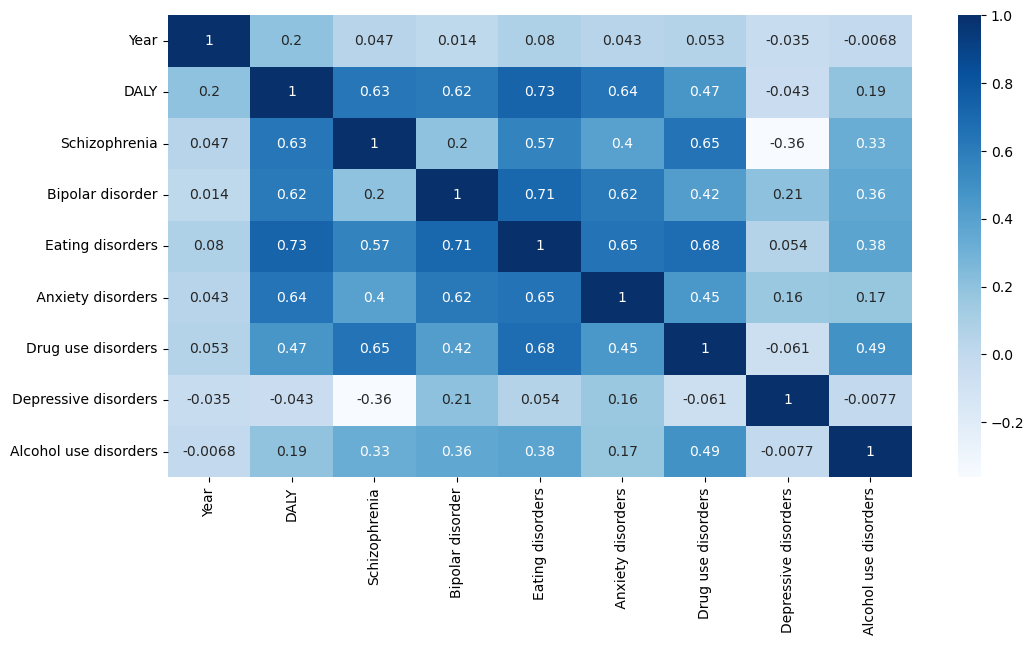

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_merged.corr(),annot=True,cmap='Blues')
plt.plot()
     

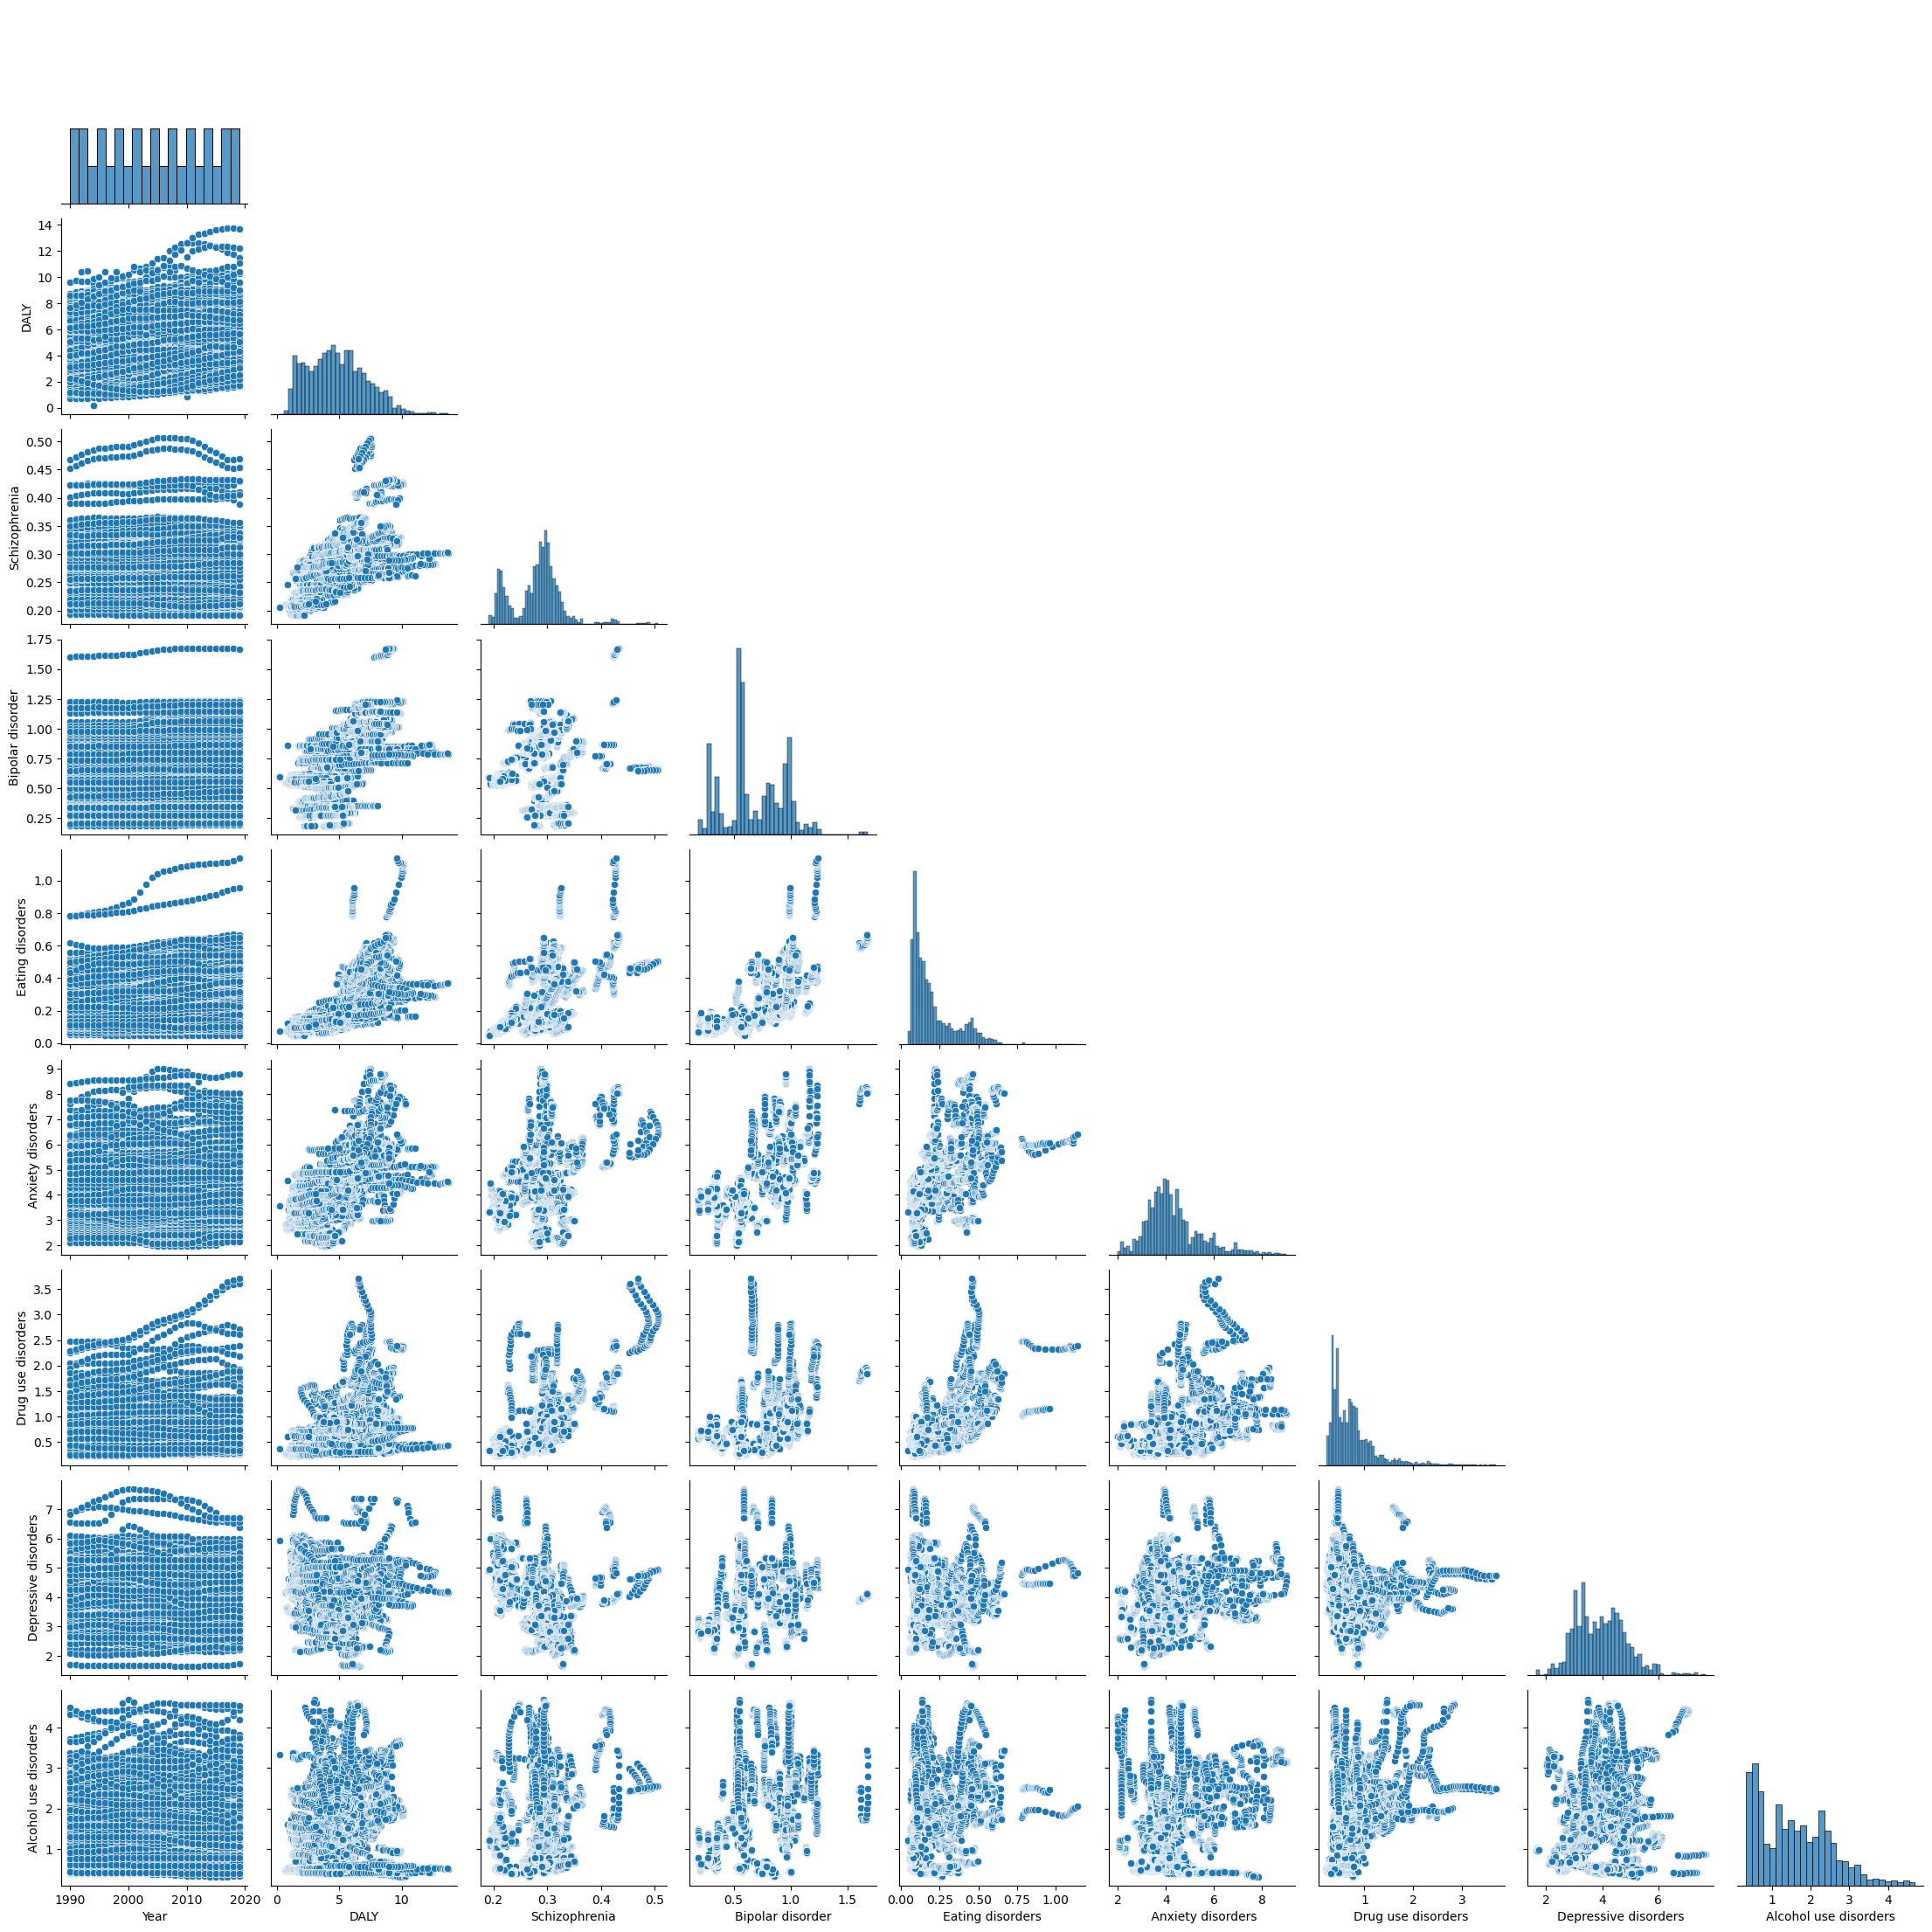

In [7]:
sns.pairplot(df_merged,corner=True)
plt.show()
     


In [8]:
mean=df_merged['DALY'].mean()
mean

4.8180618117506135

In [9]:
import plotly.express as px
fig=px.pie(df_merged,values='DALY',names='Year')
fig.show()
     


In [10]:
# Split the dataset into features (X) and target variable (y)
X = df_merged[features]
y = df_merged['DALY']
     

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
     


In [13]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
     


RandomForestRegressor(random_state=42)

In [14]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
Score= r2_score(y_test,y_pred)
print('r2 Score of Model:', Score)
     

Mean Squared Error: 0.04804629066006172
r2 Score of Model: 0.9905544566973716


In [15]:
# Real-Time Tracking (Example: Predict mental fitness label for a new data point)
new_data = pd.DataFrame([[ 0.1, 0.2, 0.3, 0.4, 0.5,0.1,0.2]], columns=features)
prediction = model.predict(new_data)
print('Predicted Mental Fitness Label:', prediction)

Predicted Mental Fitness Label: [7.66329982]


In [16]:
#yearwise variation in Different countries Alcohol use disorder
fig=px.line(df_merged,x='Year',y='Alcohol use disorders',color='Country' ,markers=True,template='plotly_dark')
fig.show()
     

     
